In [ ]:
## STATISTIC FOR MALAYSIA PROPERTY


# YUSUF BIN MOHD SUHAIR
# DATA MINING
# NIM : 3820176110357

### Import the Required Modules

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: DLL load failed: The file cannot be accessed by the system.

### Read Data

Please ensure that your folder name <span style="color:red">**does not have a space or a forward slash(/)**</span>

In [12]:
data = pd.read_csv('../data_kaggle.csv')

In [14]:
data.head()         #Inspecting the first 5 rows

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [15]:
data.shape

(53883, 8)

In [16]:
data.describe()       # Summary Statistics

,Bathrooms,Car Parks
count,51870.000000,36316.000000
mean,3.073434,2.007848
std,1.631079,1.310427
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,2.000000
max,20.000000,30.000000


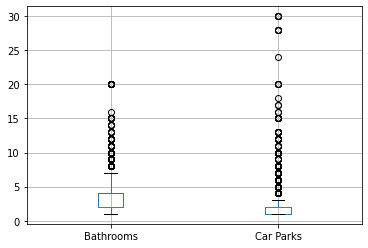

In [17]:
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A225A74B88>,
      dtype=object)

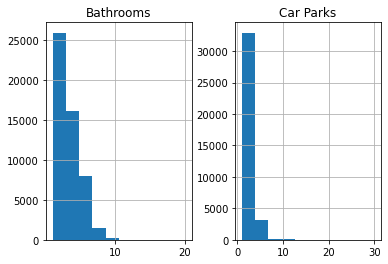

In [18]:
data.hist()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


### Data Cleaning

#### Count the number of missing values in the Dataframe

In [20]:
data.isnull()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False
3,False,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
53878,False,False,False,False,True,False,False,False
53879,False,False,False,False,True,False,False,False
53880,False,False,False,False,True,False,False,False
53881,False,False,False,False,True,False,False,False


In [21]:
# Count the number of missing values in each column
data.isnull().sum()

Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

### Check how many ratings are more than 5 - Outliers

In [25]:
data[data.Bathrooms > 2]

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
...,...,...,...,...,...,...,...,...
53876,"Sri Hartamas, Kuala Lumpur","RM 2,700,000",4+2,6.0,3.0,Condominium (Corner),"Built-up : 3,973 sq. ft.",Partly Furnished
53877,"Mont Kiara, Kuala Lumpur","RM 6,500,000",5+1,6.0,NaN,Bungalow (Corner),Land area : 6500 sq. ft.,Partly Furnished
53878,"Bangsar, Kuala Lumpur","RM 5,100,000",5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,"Bangsar, Kuala Lumpur","RM 5,000,000",5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished


In [26]:
data.drop([10472],inplace=True)

In [27]:
data[10470:10475]

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
10470,"Bandar Menjalara, Kuala Lumpur","RM 3,500,000",5,6.0,4.0,Condominium,Land area : 2594 sq. ft.,Fully Furnished
10471,"Jalan Klang Lama (Old Klang Road), Kuala Lumpur","RM 498,000",NaN,2.0,1.0,Condominium,"Built-up : 1,212 sq. ft.",Partly Furnished
10473,"Damansara, Kuala Lumpur","RM 1,600,000",5+1,5.0,2.0,2.5-sty Terrace/Link House (Intermediate),Land area : 22x75 sq. ft.,Partly Furnished
10474,"Segambut, Kuala Lumpur","RM 490,000",3,2.0,1.0,Condominium,"Built-up : 1,206 sq. ft.",Partly Furnished
10475,"Bandar Menjalara, Kuala Lumpur","RM 350,000",4,3.0,1.0,Serviced Residence (Corner),Built-up : 850 sq. ft.,Unfurnished


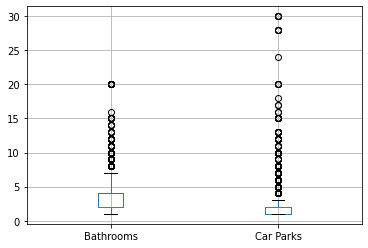

In [28]:
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2290B9DC8>,
      dtype=object)

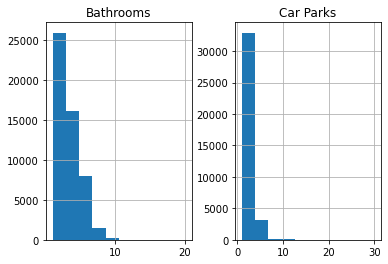

In [29]:
data.hist()

In [30]:
threshold = len(google_data)* 0.1
threshold

5388.3

In [31]:
data.dropna(thresh=threshold, axis=1, inplace=True)

In [32]:
print(data.isnull().sum())

Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64


### Data Imputation and Manipulation

#### <span style="color:blue">Fill the  null values </span>with appropriate values using <span style="color:green">aggregate functions</span> such as <span style="color:red">mean, median or mode.</span>

In [33]:
#Define a function impute_median
def impute_median(series):
    return series.fillna(series.median())

In [37]:
data.Rating = data['Bathrooms'].transform(impute_median) 

In [38]:
#count the number of null values in each column
data.isnull().sum()

Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

In [42]:
# modes of categorical values
print(data['Location'].mode())
print(data['Bathrooms'].mode())
print(data['Rooms'].mode())

0    Mont Kiara, Kuala Lumpur
dtype: object
0    2.0
dtype: float64
0    3
dtype: object


In [44]:
# Fill the missing categorical values with mode
data['Location'].fillna(str(google_data['Location'].mode().values[0]), inplace=True)
data['Bathrooms'].fillna(str(google_data['Bathrooms'].mode().values[0]), inplace=True)
data['Rooms'].fillna(str(google_data['Rooms'].mode().values[0]), inplace=True)

In [45]:
#count the number of null values in each column
data.isnull().sum()

Location             0
Price              248
Rooms                0
Bathrooms            0
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

In [46]:
data.head(10) 

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,3,2.0,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
6,"Seputeh, Kuala Lumpur",NaN,3,2.0,NaN,NaN,NaN,NaN
7,"Taman Tun Dr Ismail, Kuala Lumpur","RM 2,600,000",5,4,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished
8,"Taman Tun Dr Ismail, Kuala Lumpur","RM 1,950,000",4+1,4,3.0,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished
9,"Sri Petaling, Kuala Lumpur","RM 385,000",3,2,1.0,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished


In [47]:
data.describe()

,Car Parks
count,36315.000000
mean,2.007848
std,1.310445
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,30.000000


### Data Visualization

In [56]:
grp = data.groupby('Bathrooms')
x = grp['Rooms'].agg(np.sum)
y = grp['Bathrooms'].agg(np.sum)
z = grp['Car Parks'].agg(np.sum)
print(x)
print(y)
print(z)

Bathrooms
1.0     1111111+11111+111+1113Studio111Studio221111211...
2.0     33+132123222+12214+12+1322+1122+12+12222223212...
3.0     2+14+143+14+143+13+143+14+13+14+144+13+14+1433...
4.0     354+14+13+23+13+153+134+14+14+23+243+13+14+13+...
5.0     4+26+1664+14+13+14+13+14+15+13+13+13+14+154+14...
6.0     4+13+24+254+14+15+14+15+15+14+14+14+14+24+15+1...
7.0     66+15+16+15+15+26+15+15+25+175+16+1675+165+178...
8.0     76+16+15+2126+17+17+17+15+177+17+14+27+177+74+...
9.0     7+17+17+16+17+17+17+6+16+16+15+27+17+16+17+18+...
10.0    6+17+18+18+197+6+19+18+1078101010+8+18+18+18+1...
11.0                      7+167+19+113+116+7+187+112+37+1
12.0                           88106+1810812+812+13+89810
13.0                                        13+1113+11213
14.0                                        10+11810+112+
15.0                                    15+149+19+110+5+1
16.0                                                   14
20.0    20 Above33+14320 Above20 Above20 Above20 Above...
2.0 

In [59]:
plt.figure(figsize=(12,5))
plt.plot(x, "ro", color='g')
plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

In [60]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

NameError: name 'plt' is not defined

In [61]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

NameError: name 'plt' is not defined

In [62]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

NameError: name 'plt' is not defined